# Course 5 Task 3 - Credit Default - Build and Evaluate Models

## Import Libraries

In [13]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Reading Data Set using Pandas

In [2]:
credit = pd.read_csv("credit_preped.csv")

In [3]:
# check the first 5 rows of the data frame
credit.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_IND,AGE_BIN
0,0,1,20000,2,2,1,24,2,2,-1,...,0,0,0,689,0,0,0,0,1,"(17, 25]"
1,1,2,120000,2,2,2,26,-1,2,0,...,3455,3261,0,1000,1000,1000,0,2000,1,"(25, 35]"
2,2,3,90000,2,2,2,34,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,"(25, 35]"
3,3,4,50000,2,2,1,37,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,"(35, 45]"
4,4,5,50000,1,2,1,57,-1,0,-1,...,19146,19131,2000,36681,10000,9000,689,679,0,"(55, 67]"


## Remove Unneeded columns

In [4]:
# remove ID column, and Age columns
credit = credit.drop(columns=['Unnamed: 0','ID','AGE'])
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_IND,AGE_BIN
0,20000,2,2,1,2,2,-1,-1,-2,-2,...,0,0,0,689,0,0,0,0,1,"(17, 25]"
1,120000,2,2,2,-1,2,0,0,0,2,...,3455,3261,0,1000,1000,1000,0,2000,1,"(25, 35]"
2,90000,2,2,2,0,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,"(25, 35]"
3,50000,2,2,1,0,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,"(35, 45]"
4,50000,1,2,1,-1,0,-1,0,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,"(55, 67]"


## Feature Engineering

### One hot encoding

In [5]:
# get dummy variable colums for AGE_BIN
dummy = pd.get_dummies(credit['AGE_BIN'])
dummy.head()

,"(17, 25]","(25, 35]","(35, 45]","(45, 55]","(55, 67]","(67, 100]"
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0


In [6]:
credit_dummy = pd.concat([credit, dummy], axis=1)
credit_dummy.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,DEFAULT_IND,AGE_BIN,"(17, 25]","(25, 35]","(35, 45]","(45, 55]","(55, 67]","(67, 100]"
0,20000,2,2,1,2,2,-1,-1,-2,-2,...,0,0,1,"(17, 25]",1,0,0,0,0,0
1,120000,2,2,2,-1,2,0,0,0,2,...,0,2000,1,"(25, 35]",0,1,0,0,0,0
2,90000,2,2,2,0,0,0,0,0,0,...,1000,5000,0,"(25, 35]",0,1,0,0,0,0
3,50000,2,2,1,0,0,0,0,0,0,...,1069,1000,0,"(35, 45]",0,0,1,0,0,0
4,50000,1,2,1,-1,0,-1,0,0,0,...,689,679,0,"(55, 67]",0,0,0,0,1,0


In [7]:
# rearrange columns so dependent is last and AGE_BIN is removed
credit_dummy = credit_dummy[credit_dummy.columns[0:22].tolist() + credit_dummy.columns[-6:].tolist() + credit_dummy.columns[22:23].tolist()]
credit_dummy.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,"(17, 25]","(25, 35]","(35, 45]","(45, 55]","(55, 67]","(67, 100]",DEFAULT_IND
0,20000,2,2,1,2,2,-1,-1,-2,-2,...,0,0,0,1,0,0,0,0,0,1
1,120000,2,2,2,-1,2,0,0,0,2,...,1000,0,2000,0,1,0,0,0,0,1
2,90000,2,2,2,0,0,0,0,0,0,...,1000,1000,5000,0,1,0,0,0,0,0
3,50000,2,2,1,0,0,0,0,0,0,...,1100,1069,1000,0,0,1,0,0,0,0
4,50000,1,2,1,-1,0,-1,0,0,0,...,9000,689,679,0,0,0,0,1,0,0


## Correlation

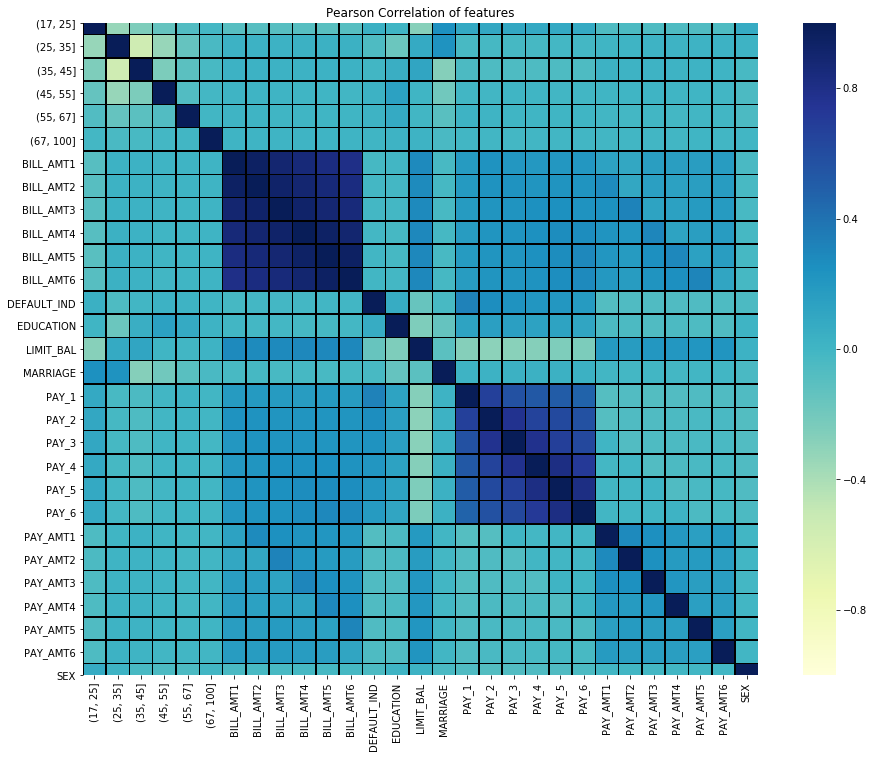

In [57]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in credit_dummy.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)

# Get to the numeric columns by inversion            
num_list = credit_dummy.columns.difference(str_list) 

# Create Dataframe containing only numerical features
credit_num = credit_dummy[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')

# Draw the heatmap using seaborn
sns.heatmap(credit_num.astype(float).corr(),linewidths=0.5, vmax=1.0, vmin=-1.0, square=True, cmap="YlGnBu", linecolor='k', annot=False);

### Recursive Feature Elimination

In [9]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [10]:
# Store the column/feature names into a list "colnames"
colnames = credit_dummy.iloc[:,0:-1].columns
colnames

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', '(17, 25]', '(25, 35]',
       '(35, 45]', '(45, 55]', '(55, 67]', '(67, 100]'],
      dtype='object')

In [14]:
# Create the RFE object and rank each feature on a subset of 1,000 records
rf = RandomForestClassifier(n_jobs=-1, n_estimators=50, verbose=3, random_state=101)
#rf.fit(random_X_test, random_y_test)
rf.fit(credit_dummy.iloc[:,0:-1], credit_dummy.iloc[:,-1])
ranks["RF"] = ranking(rf.feature_importances_, colnames);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50
building tree 2 of 50building tree 3 of 50
building tree 4 of 50

building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished


In [15]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)

In [16]:
# Put the mean scores into a Pandas dataframe and sort
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
meanplot

,Feature,Mean Ranking
4,PAY_1,1.00
0,LIMIT_BAL,0.68
10,BILL_AMT1,0.66
11,BILL_AMT2,0.58
12,BILL_AMT3,0.56
16,PAY_AMT1,0.55
15,BILL_AMT6,0.54
14,BILL_AMT5,0.54
13,BILL_AMT4,0.53
17,PAY_AMT2,0.51


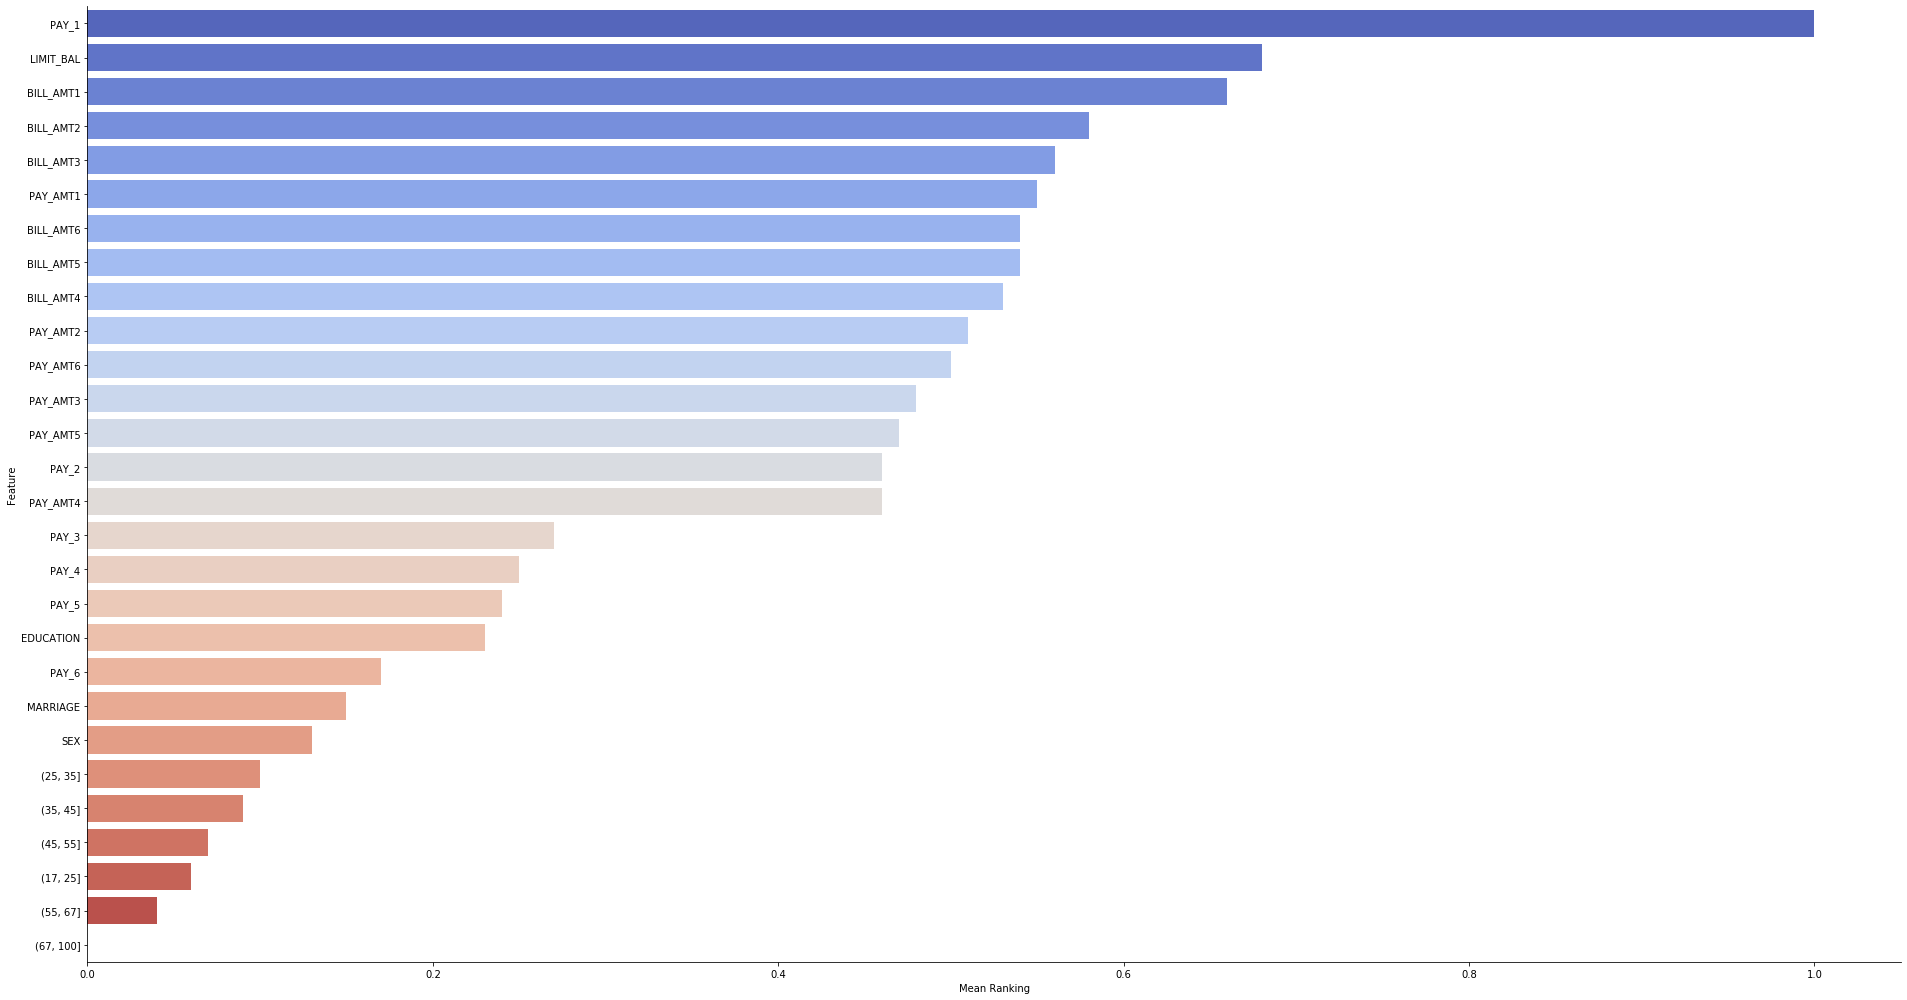

In [17]:
# Let's plot the ranking of the features
sns.catplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               height=14, aspect=1.9, palette='coolwarm');

In [18]:
# remove all features below 40% importance
credit_model = credit_dummy.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE','(17, 25]', '(25, 35]',
       '(35, 45]', '(45, 55]', '(55, 67]', '(67, 100]', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

In [19]:
credit_model.columns

Index(['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT_IND'],
      dtype='object')

## Create train and test datasets

In [20]:
# features
X = credit_model.iloc[:,0:-1]
X.head()

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,-1,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,-1,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [21]:
# dependent variable
y = credit_model.iloc[:,-1]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT_IND, dtype: int64

In [22]:
# split the data (4 dataframes: 2 for training - x_train, y_train, 1 for testing - x_test, 1 for ground truth - y_test)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 123)

In [23]:
# count and view the features in the new X_train training set
X_train_count = len(X_train.index)
print('The number of observations in the X training set are:',str(X_train_count))
X_train.head()

The number of observations in the X training set are: 22500


,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16095,140000,1,2,59379,63007,61459,59798,61287,8383,5200,0,0,3009,1000,94000
28548,210000,0,0,43047,9378,0,0,0,0,1000,0,0,0,0,0
25096,20000,-1,0,13561,13050,390,18280,2880,1600,1105,390,18280,2880,1600,0
12260,90000,2,4,37639,38743,37825,40299,39093,38167,2000,0,3400,0,0,1000
21549,50000,-2,-2,2498,-2,1697,0,0,5000,0,1699,0,0,5000,0


In [24]:
# count and view the features in the new X_test testing set
X_test_count = len(X_test.index)
print('The number of observations in the X testing set are:',str(X_test_count))
X_test.head()

The number of observations in the X testing set are: 7500


,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
25665,40000,-1,0,28991,24391,13600,0,44024,18697,1300,1000,0,22373,680,10000
16464,80000,0,0,75662,70073,53169,50875,50372,49470,3212,2106,2000,1603,1903,2006
22386,170000,2,2,155910,158819,161487,157577,168094,170922,6800,6500,0,13000,5500,1000
10149,200000,-2,-2,23570,735,0,0,0,0,742,0,0,0,0,0
8729,50000,0,0,8214,8034,9044,9225,9417,9617,1140,1150,331,341,356,330


In [25]:
# count and view the dependent variable in the new y_train training set
y_train_count = len(y_train.index)
print('The number of observations in the y training set are:',str(y_train_count))
y_train.head()

The number of observations in the y training set are: 22500


16095    0
28548    0
25096    1
12260    0
21549    0
Name: DEFAULT_IND, dtype: int64

In [26]:
# count and view the dependent variable in the new y_test Ground Truth set
y_test_count = len(y_test.index)
print('The number of observations in the y testing Ground Truth set are:',str(y_test_count))
y_test.head()

The number of observations in the y testing Ground Truth set are: 7500


25665    0
16464    0
22386    1
10149    1
8729     0
Name: DEFAULT_IND, dtype: int64

## Create Models

### Run different models and choose the best

In [27]:
# prepare models that will be used
models = []
models.append(('LR', LogisticRegression(random_state=55)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='scale')))

In [28]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/susanawomack/anaconda3/envs/Course5/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/susanawomack/anaconda3/envs/Course5/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/susanawomack/anaconda3/envs/Course5/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/susanawomack/anaconda3/envs/Course5/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/susanawomack/anaconda3/envs/Course5/lib/python3.7/site-pa

LR: 0.777289 (0.007255)
LDA: 0.809822 (0.006451)
KNN: 0.752711 (0.005987)
CART: 0.726444 (0.007416)


/Users/susanawomack/anaconda3/envs/Course5/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/susanawomack/anaconda3/envs/Course5/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/susanawomack/anaconda3/envs/Course5/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/susanawomack/anaconda3/envs/Course5/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

RF: 0.800489 (0.006185)
SVM: 0.777378 (0.007234)


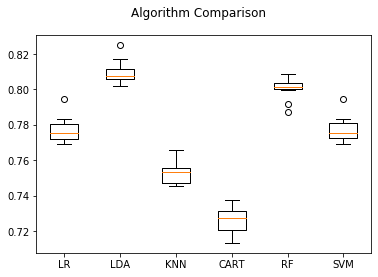

In [29]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Model tuning on best two models: LDA and RF

In [30]:
# prepare models that will be used
models_tune = []

models_tune.append(('LDA1', LinearDiscriminantAnalysis(solver='lsqr')))
models_tune.append(('LDA2', LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')))
models_tune.append(('LDA3', LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto', n_components=1)))

models_tune.append(('RF1', RandomForestClassifier(n_estimators=50, max_depth=4, random_state=777)))
models_tune.append(('RF2', RandomForestClassifier(n_estimators=50, max_depth=8, random_state=777)))
models_tune.append(('RF3', RandomForestClassifier(n_estimators=100, max_depth=8,random_state=777)))
models_tune.append(('RF4', RandomForestClassifier(n_estimators=100, max_depth=12,random_state=777)))

In [31]:
# evaluate each model in turn
results_tuned = []
names_tuned = []
scoring = 'accuracy'
for name, model in models_tune:
    kfold = KFold(n_splits=10, random_state=777)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results_tuned.append(cv_results)
    names_tuned.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA1: 0.809822 (0.006451)
LDA2: 0.809467 (0.006444)
LDA3: 0.809467 (0.006444)
RF1: 0.809244 (0.006549)
RF2: 0.819422 (0.006165)
RF3: 0.819733 (0.005527)
RF4: 0.817778 (0.005461)


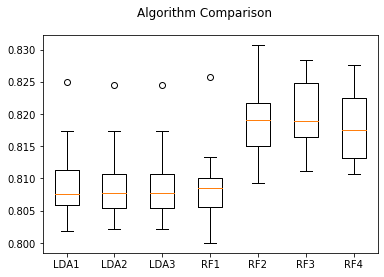

In [32]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_tuned)
ax.set_xticklabels(names_tuned)
plt.show()

###  Selected Model is Random Forest -- n_estimators=100, max_depth=8

In [36]:
# fit the selected model to the training data
model_selected = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=777)
model_selected.fit(X_train, y_train)
model_selected

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=777,
                       verbose=0, warm_start=False)

## Predict and Analyze Results

In [37]:
# create predictions
expected = y_test
predicted = model_selected.predict(X_test)

In [38]:
# model metrics
print(classification_report(expected,predicted))

accruacy = accuracy_score(expected, predicted)*100
print("Accuracy: %0.f%%" % accruacy)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.67      0.35      0.46      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.67      7500
weighted avg       0.80      0.82      0.80      7500

Accuracy: 82%


## Plot model results

In [126]:
# create confusion matrix
cm = confusion_matrix(expected, predicted) 

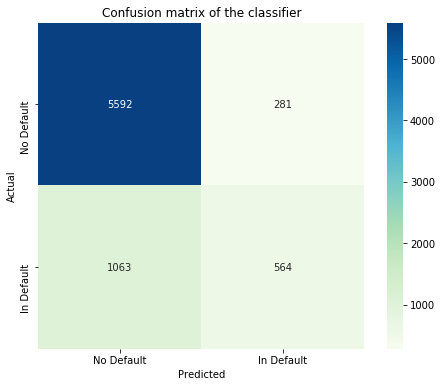

In [127]:
# plot
xlabels = ['No Default', 'In Default']
ylabels = ['No Default', 'In Default']
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', square=True, linecolor='k')
ax.set_xticklabels(labels) 
ax.set_yticklabels(labels) 
ax.yticks=[0, 2.0]
ax.xticks=[0, 0]
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix of the classifier') 
plt.show()